IMPORT SOME LIBRARY

In [ ]:
# import pandas library for basic data operation
import pandas as pd

# import matplotlib and seaborn library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import style set for styling the plot
from matplotlib import style

# setting style as ggplot
style.use('ggplot')

# import some libraries for text processing
# import re for using the regex function
import re

# wear tokenize to perform tokenization port
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

READ DATA

In [12]:
# read the data which in a tsv file format
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

# read which place the initial data using the head function
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [13]:
# use info method to gain more insight about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [14]:
# check for null values 
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

ANALYZE RATING COLUMN

<AxesSubplot:xlabel='rating', ylabel='count'>

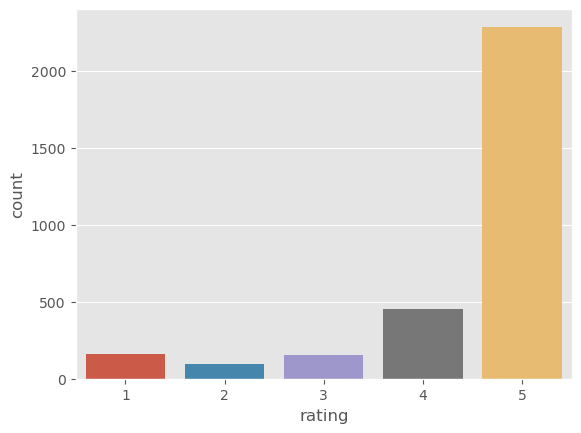

In [15]:
# analyze rating column 
sns.countplot(x='rating', data=df)

In [16]:
# count each ratings
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

VISUALIZE DATA FROM RATING COLUMN

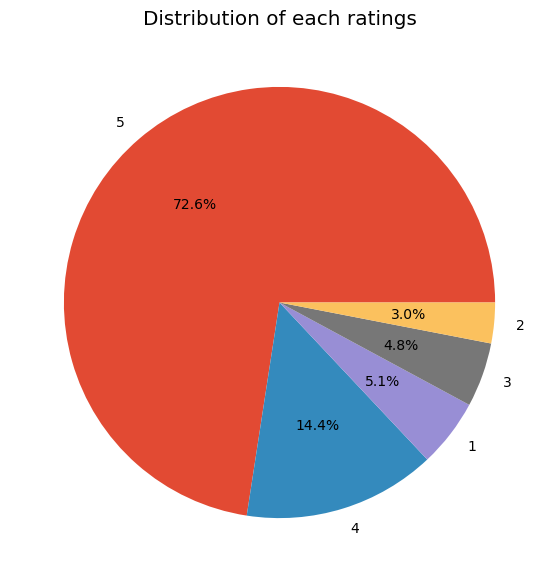

In [45]:
# visualize the distribution of each ratings using pie chart
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()  # specify the different tag in pie chart
tags.plot(kind='pie', autopct='%1.1f%%', label='') # plot the pie chart
plt.title("Distribution of each ratings") # add heading to the pie chart
plt.show()

ANALYZE VARIATION COLUMN

<AxesSubplot:xlabel='count', ylabel='variation'>

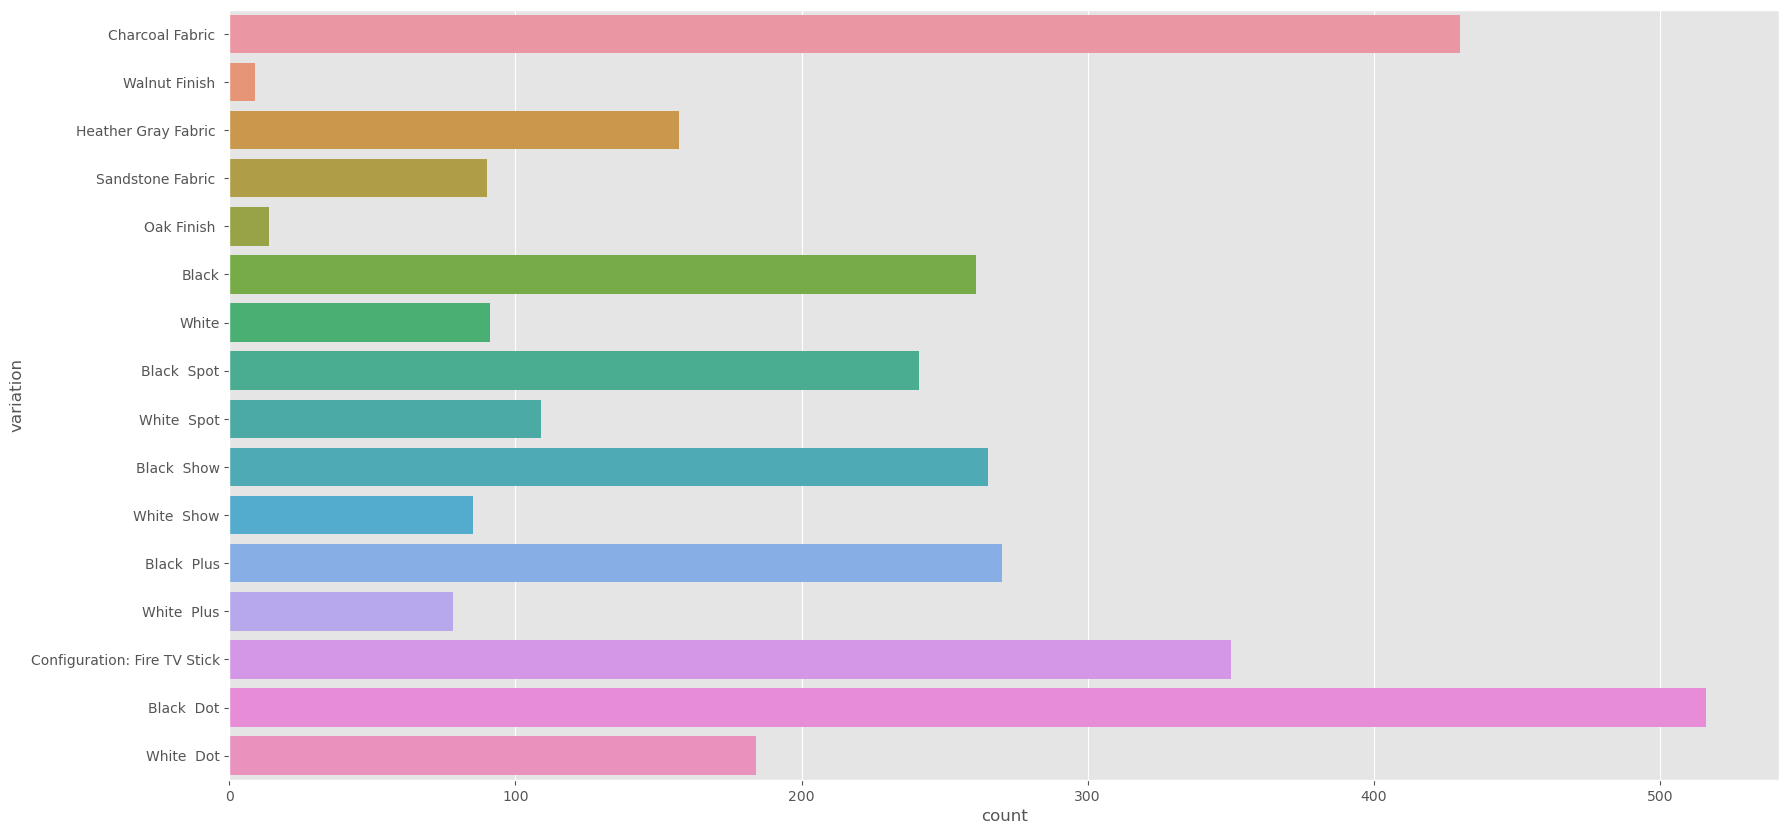

In [18]:
# analyze variation column use count plot to see the distribution of each products
fig = plt.figure(figsize=(20,10))
sns.countplot(y='variation', data=df)

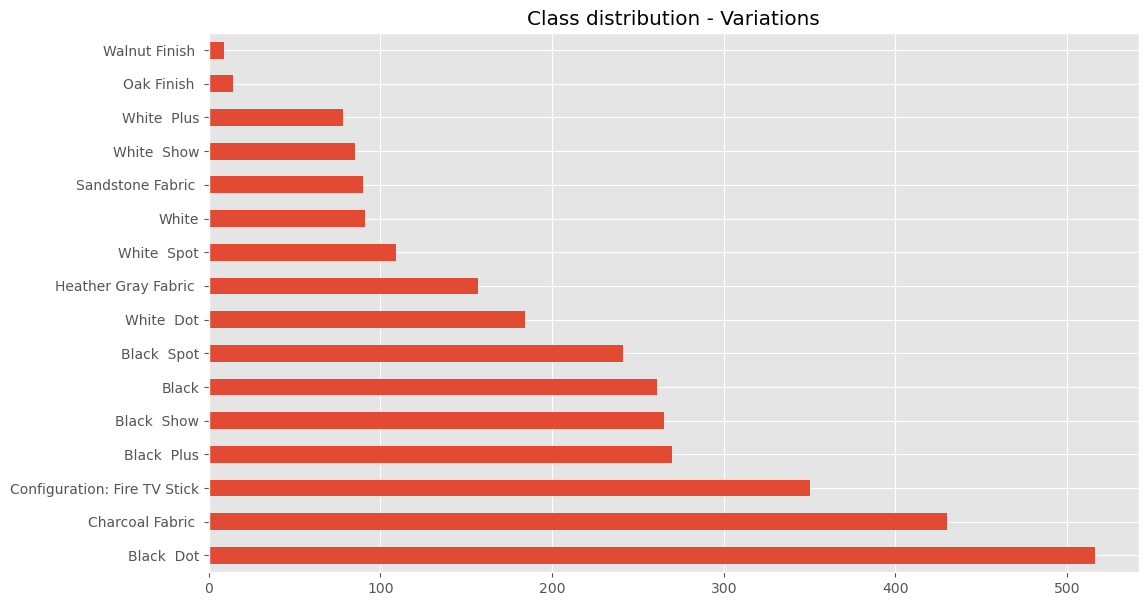

In [19]:
# analyze variation column use a classic bar chart to plot product variations
df.variation.value_counts().plot.barh(figsize=(12,7))
plt.title("Class distribution - Variations");

In [20]:
# count the different product using value count
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [21]:
# see rating given by the customer for black dot product
df[df['variation']=='Black  Dot']['rating'].value_counts()

5    362
4     84
3     34
1     22
2     14
Name: rating, dtype: int64

In [22]:
# see rating given by the customer for charcoal fabric product
df[df['variation']=='Charcoal Fabric ']['rating'].value_counts()

5    352
4     56
3     10
2      8
1      4
Name: rating, dtype: int64

In [23]:
# count the feedback for black dot product
df[df['variation']=='Black  Dot']['feedback'].value_counts()

1    480
0     36
Name: feedback, dtype: int64

VISUALIZE DATA FROM FEEDBACK COLUMN

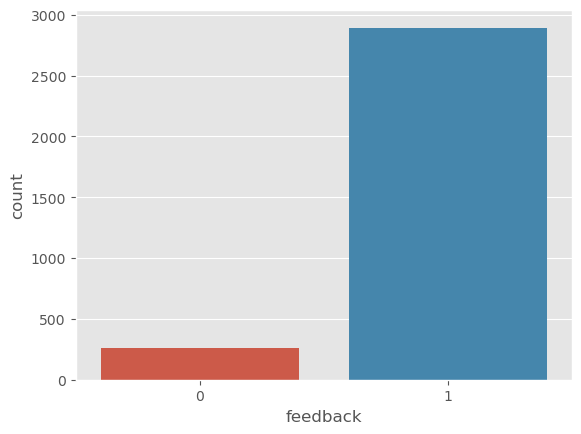

In [24]:
# visualize the feedback product using count plot
sns.countplot(x='feedback', data=df)
plt.show()

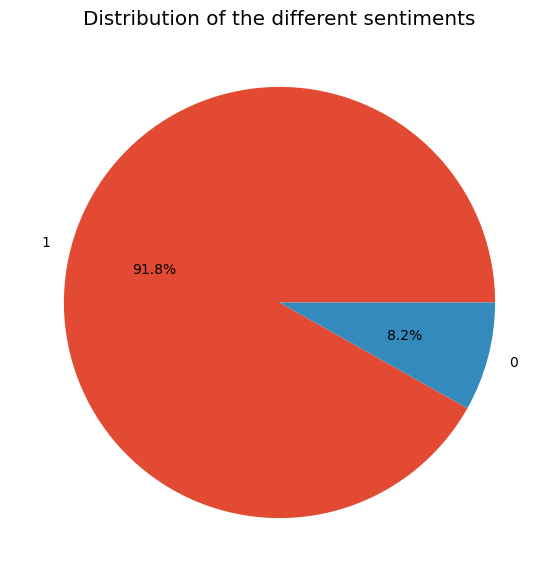

In [25]:
# visualize the feedback product using pie chart
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts() # specify the different tag in pie chart
tags.plot(kind='pie', autopct='%1.1f%%', label='') # plot the pie chart
plt.title("Distribution of the different sentiments") # add heading to the pie chart
plt.show()

ANALYZE VERIFIED REVIEWS COLUMN

In [26]:
# see the length of the different reviews
df['review_length'] = df.verified_reviews.str.len()
# see the modified data
df.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [27]:
# see the min and max length of reviews 
df['review_length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: review_length, dtype: float64

Text(0, 0.5, 'Count')

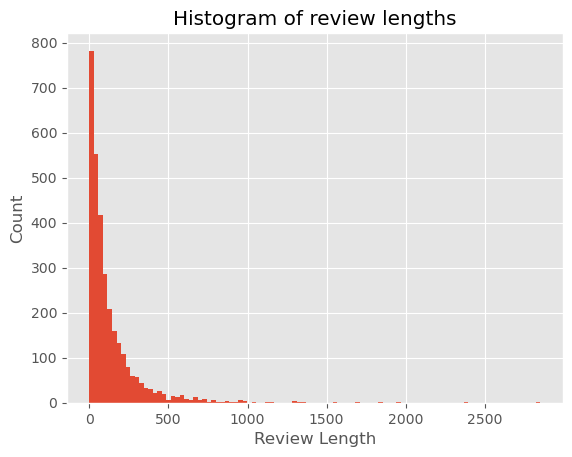

In [28]:
# plot the different lengths using a histogram
plt.hist(df['review_length'], bins=100)
plt.title("Histogram of review lengths")
plt.xlabel('Review Length')
plt.ylabel('Count')

In [46]:
# analyze some of the user review
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [47]:
# define a function to do the different processing methods
def data_processing(text): 
    text = text.lower() # performing lowercase conversion
    text = re.sub(r"http\S+|www\S+https\S+",'', text, flags = re.MULTILINE) # removing any URLs that maybe present
    text = re.sub(r'[^\w\s]','',text) # removing the punctuations
    text_tokens = word_tokenize(text) # performing tokenization and remain stop words
    filtered_text = [w for w in text_tokens if not w in stop_words] # remain stop words
    returning the process text data
    return " ".join(filtered_text)

In [51]:
# apply the preprocessing function above
df.verified_reviews = df['verified_reviews'].apply(data_processing)

In [52]:
# perform stemming on the data use port HTML
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [53]:
# apply stemming to the process data
df['verified_reviews'] = df['verified_reviews'].apply(lambda x:stemming(x))

In [54]:
# analyze the same text as before to see the process text data
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

love echo 

1 

loved 

1 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

1 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

1 

music 

1 



VISUALIZE POSITIVE AND NEGATIVE REVIEWS

In [39]:
# visualize the positive and negative data using word cloud
# separate positive data
pos_reviews = df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


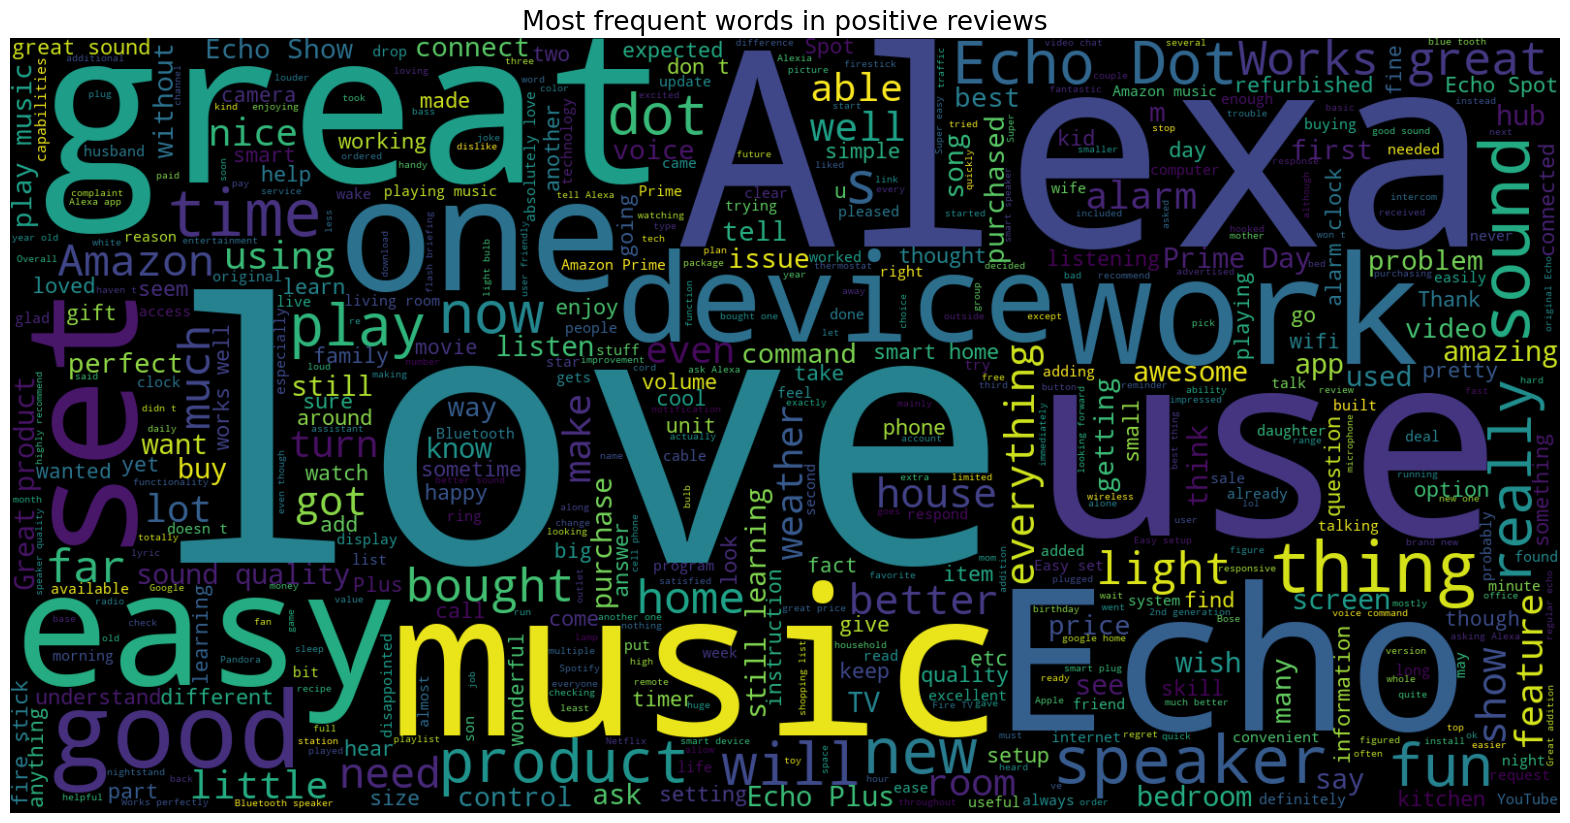

In [40]:
# use the word cloud to visualize positive reviews
# pulling the text data from the positive reviews
text = ' '.join([word for word in pos_reviews['verified_reviews']])
# setting figure size
plt.figure(figsize=(20,15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# generating the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# add heading
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [41]:
# separate negative data
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback,review_length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


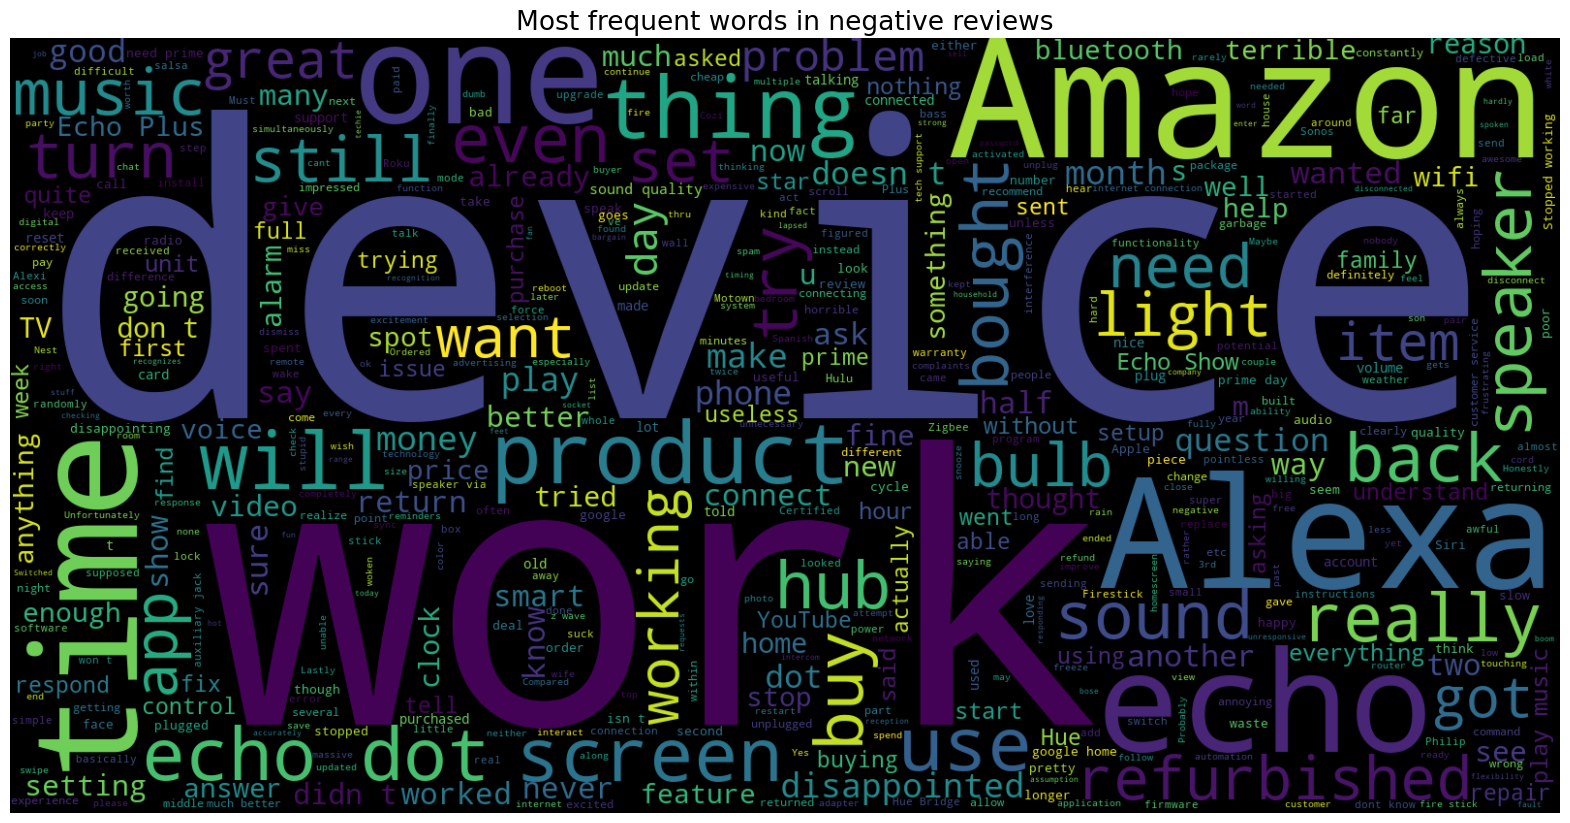

In [42]:
# use the word cloud to visualize the negative reviews
# pulling the text data from the positive reviews
text = ' '.join([word for word in neg_reviews['verified_reviews']])
# setting figure size
plt.figure(figsize=(20,15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# generating the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# add heading
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()